# Task 2 - Suprvised Machine learning

In this regression task,predicting the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

In [1]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [33]:
#reading the data into a file
file_path = 'http://bit.ly/w-data'
dataset = pd.read_csv(file_path)
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#Marking down data by converting into labels(output) and attributes(inputs)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,1].values
print('created labels and attributes successfully')

created labels and attributes successfully


# DATA VISUALIZATION

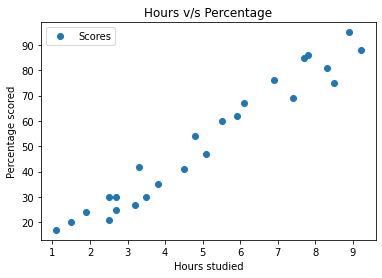

In [6]:
#Plotting an Hours v/s Percentage graph
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours v/s Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.show()

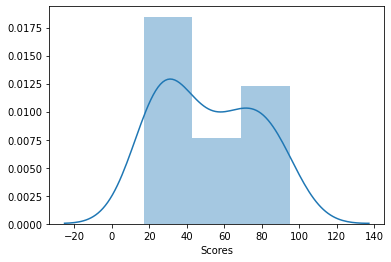

In [7]:
#checking the scores distribution
sns.distplot(dataset['Scores'])

In [9]:
#splitting the dataset into train and test data for the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

# MODEL TRAINING

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# REGRESSION LINE VISUALIZATION

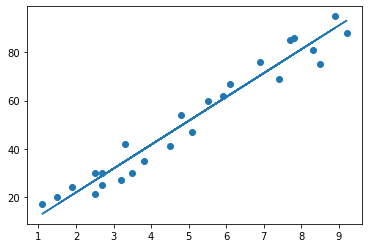

In [17]:
#plotting a graph for the test data
line = model.coef_*X+model.intercept_ 
plt.scatter(X,y)
plt.plot(X, line)
plt.show() 

# PREDICTION

In [23]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [24]:
#comapring actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [28]:
#testing with custom data
hours = [[8.9]]
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))
#final_prediction = model.predict(np.array([[9.25]]).reshape(1,1))[0][0]
#print("Predicted scores on 9.25 hours study:", final_prediction)

No of Hours = [[8.9]]
Predicted Score = 90.22300271915059


# EVALUATING THE MODEL

In [34]:
# Evaluating is done with the help of mean absolute error
from sklearn.metrics import mean_absolute_error
mn = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error :', mn)

Mean Absolute Error : 4.183859899002975
